### **UNIVERSIDAD TORCUATO DI TELLA - MAESTRÍA EN ECONOMETRÍA**  

#### **ANÁLISIS ESTADÍSTICO MULTIVARIADO** 

**Profesora**: Clemente, Alejandra.  
**Ayudante**: Mendoza Greco, Maximiliano.  
**Alumnos**: Dignani, Franco; Guzzi, David.

**Ciclo lectivo**: Segundo Trimestre 2024.

#### **1. ANÁLISIS EXPLORATORIO**

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

#Configuraciones
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)


In [2]:
#Lectura y visualización de matriz de datos
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"
df = pd.read_excel(path).sort_values(by='Country Name')
df

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,Argentina,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090
1,Australia,AUS,47.1238,3.9746,2.1059,0.6622,2.1131,2.5583,13.8760
2,Austria,AUT,32.1281,16.0631,1.5208,1.8149,1.0524,3.6561,41.4850
3,Belgium,BEL,44.7960,28.3120,1.2331,1.0485,0.6700,0.9196,1.9590
4,Canada,CAN,6.4344,4.3107,3.6934,0.8181,1.6971,1.5105,18.5180
5,Chile,CHL,15.2390,1.7577,6.9273,0.7305,3.9878,9.0692,12.3570
6,Colombia,COL,39.9766,1.9040,4.0533,0.8649,6.4107,16.1112,18.8960
7,Costa Rica,CRI,34.7826,4.7591,1.8074,1.0280,4.2021,15.3081,19.9240
8,Czechia,CZE,45.6400,32.1800,1.3095,1.0655,1.8608,2.6638,26.0790
9,Denmark,DNK,65.6491,59.8983,2.5385,2.4779,1.2663,2.2230,12.0060


In [3]:
df.columns = df.columns.str.replace(r"\s*\(.*\)", "", regex=True) #Se elimina información entre paréntesis
ndf = df.iloc[:,1:].set_index('Country Code') #ndf: numereric data frame

In [4]:
#Breve información de la matriz de datos (cantidad de observaciones, tipo de formatos, etc.)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, ARG to USA
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agricultural land                                39 non-null     float64
 1   Arable land                                      39 non-null     float64
 2   Agricultural raw materials exports               39 non-null     float64
 3   Agricultural raw materials imports               39 non-null     float64
 4   Agriculture, forestry, and fishing, value added  39 non-null     float64
 5   Employment in agriculture                        39 non-null     float64
 6   Rural population                                 39 non-null     float64
dtypes: float64(7)
memory usage: 2.4+ KB


In [5]:
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
desc = ndf.describe()
cv = pd.DataFrame(ndf.std() / ndf.mean()).T
cv.index = ['cv']
kurt = pd.DataFrame(ndf.kurt()).T
kurt.index = ['kurt']
skew = pd.DataFrame(ndf.skew()).T
skew.index = ['skew']
desc = pd.concat([desc, cv, kurt, skew], axis=0).reset_index()
desc = desc.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'
desc

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [6]:
#Estadísticas descriptivas (sin incluir Argentina)
ndf_oecd = ndf.drop('ARG')
desc_oecd = ndf_oecd.describe()
cv_oecd = pd.DataFrame(ndf_oecd.std() / ndf_oecd.mean()).T
cv_oecd.index = ['cv']
kurt_oecd = pd.DataFrame(ndf_oecd.kurt()).T
kurt_oecd.index = ['kurt']
skew_oecd = pd.DataFrame(ndf_oecd.skew()).T
skew_oecd.index = ['skew']
desc_oecd = pd.concat([desc_oecd, cv_oecd, kurt_oecd, skew_oecd], axis=0).reset_index()
desc_oecd = desc_oecd.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'

#Para Argentina
ndf_arg = ndf.loc[['ARG']].reset_index()

display(desc_oecd, ndf_arg)

# """Ver si ARG no se encuentra muy fuera del promedio de la OCDE"""

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000
1,mean,38.2349,18.3569,2.4465,1.3775,2.3334,5.0116,21.5999
2,std,17.5183,13.8070,2.8728,0.6408,1.5686,4.4405,11.1874
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.7273,6.6695,0.6938,0.8884,1.2844,2.1149,13.5078
5,50%,43.7443,16.3399,1.3380,1.1531,1.8841,3.7172,19.3630
6,75%,48.6791,27.4033,2.7402,1.7839,3.2592,5.7397,29.0370
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4582,0.7521,1.1742,0.4652,0.6723,0.8860,0.5179
9,kurt,-0.4182,0.7749,4.1573,0.0087,0.9200,1.9896,-0.3474


,Country Code,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090


In [7]:
#Cálculo de matriz de varianzas y covarianzas (incluye todos los registros)
mcov = ndf.cov()
mcov

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,299.2999,143.1640,-15.1587,-0.2389,-1.6690,5.1291,28.7369
Arable land,143.1640,185.9197,-9.1130,3.2334,-5.5738,-11.6462,21.6284
Agricultural raw materials exports,-15.1587,-9.1130,8.0986,0.5600,1.6387,1.1587,-1.0304
Agricultural raw materials imports,-0.2389,3.2334,0.5600,0.4027,0.0430,0.1770,2.0701
"Agriculture, forestry, and fishing, value added",-1.6690,-5.5738,1.6387,0.0430,2.6243,5.7188,-0.8835
Employment in agriculture,5.1291,-11.6462,1.1587,0.1770,5.7188,19.3369,7.1725
Rural population,28.7369,21.6284,-1.0304,2.0701,-0.8835,7.1725,126.6001


In [8]:
#Cálculo de matriz de correlaciones (incluye todos los registros)
mcor = ndf.corr()
mcor

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,1.0000,0.6069,-0.3079,-0.0218,-0.0596,0.0674,0.1476
Arable land,0.6069,1.0000,-0.2349,0.3737,-0.2523,-0.1942,0.1410
Agricultural raw materials exports,-0.3079,-0.2349,1.0000,0.3101,0.3555,0.0926,-0.0322
Agricultural raw materials imports,-0.0218,0.3737,0.3101,1.0000,0.0419,0.0634,0.2899
"Agriculture, forestry, and fishing, value added",-0.0596,-0.2523,0.3555,0.0419,1.0000,0.8028,-0.0485
Employment in agriculture,0.0674,-0.1942,0.0926,0.0634,0.8028,1.0000,0.1450
Rural population,0.1476,0.1410,-0.0322,0.2899,-0.0485,0.1450,1.0000


In [9]:
#Medidas de variabilidad conjunta y medidas de correlación conjunta
varianza_total = np.trace(mcov)
varianza_media = varianza_total / len(ndf.columns)
varianza_generalizada = np.linalg.det(mcov)
varianza_efectiva = varianza_generalizada**(1/len(ndf.columns))

dependencia_conjunta = np.linalg.det(mcor)
dependencia_efectiva = dependencia_conjunta**(1/(len(ndf.columns)-1))

medidas_globales = pd.DataFrame([[varianza_total, varianza_media, varianza_generalizada, varianza_efectiva, dependencia_conjunta, dependencia_efectiva]],
                                columns=['varianza_total', 'varianza_media', 'varianza_generalizada', 'varianza_efectiva', 'dependencia_conjunta', 'dependencia_efectiva'])
medidas_globales

,varianza_total,varianza_media,varianza_generalizada,varianza_efectiva,dependencia_conjunta,dependencia_efectiva
0,642.2821,91.7546,77537504.1862,13.3990,0.0665,0.6365


#### **2. ANÁLISIS DE COMPONENTES PRINCIPALES**

In [10]:
"""
Análisis de Componentes Principales - Matriz de Covarianzas

"""

pca_cov = PCA()
componentes_cov = pca_cov.fit_transform(ndf)

varianza_cov = pca_cov.explained_variance_
std_componentes_cov = np.sqrt(pca_cov.explained_variance_) #Ver si eliminamos
varianza_explicada_cov = pca_cov.explained_variance_ratio_
varianza_explicada_acum_cov = np.cumsum(pca_cov.explained_variance_ratio_)
coeficientes_cov =  pca_cov.components_.T

#Generamos una tabla resumen
data_var_cov = {
    'Varianza (eigenvalues)': varianza_cov,
    'Desviación Estándar': std_componentes_cov,
    'Varianza Explicada': varianza_explicada_cov,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cov
}

variablespca_cov = pd.DataFrame(data_var_cov, index=[f'Componente {i+1}' for i in range(len(varianza_cov))]).reset_index()
variablespca_cov



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,402.1466,20.0536,0.6261,0.6261
1,Componente 2,122.5019,11.0681,0.1907,0.8169
2,Componente 3,91.1414,9.5468,0.1419,0.9588
3,Componente 4,18.4013,4.2897,0.0286,0.9874
4,Componente 5,7.2756,2.6973,0.0113,0.9987
5,Componente 6,0.6005,0.7749,0.0009,0.9997
6,Componente 7,0.2148,0.4635,0.0003,1.0000


In [11]:
coeficientespca_cov = pd.DataFrame(coeficientes_cov, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cov.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cov


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,0.8187,-0.1213,-0.5521,-0.0820,0.0568,-0.0018,0.0134
1,Arable land,0.5575,-0.0498,0.8125,0.1600,-0.0063,0.0045,-0.0311
2,Agricultural raw materials exports,-0.0448,0.0119,0.0085,0.1400,0.9733,-0.1460,-0.0976
3,Agricultural raw materials imports,0.0046,0.0158,0.0297,0.0361,0.0723,-0.1409,0.9861
4,"Agriculture, forestry, and fishing, value added",-0.0117,0.0002,-0.0518,0.3047,0.1084,0.9376,0.1164
5,Employment in agriculture,-0.0039,0.0685,-0.1766,0.9216,-0.1799,-0.2815,-0.0565
6,Rural population,0.1293,0.9888,-0.0152,-0.0682,0.0062,0.0234,-0.0106


In [12]:
componentespca_cov = pd.DataFrame(componentes_cov, columns=[f'Componente {i+1} ' for i in range(componentes_cov.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cov

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,-0.0846,-13.3099,-5.4421,2.7610,-1.4191,2.0268,0.3427
1,Australia,-1.7125,-7.8332,-15.9116,-4.9780,0.6197,0.3196,0.0796
2,Austria,-3.6418,20.7706,1.6602,-3.0475,-0.9359,-0.3337,0.2181
3,Belgium,8.4727,-20.6625,5.6962,-2.1385,-0.4236,-0.6640,-0.1900
4,Canada,-34.3002,1.6272,6.9804,-2.7682,0.0333,0.1560,-0.5140
5,Chile,-29.5127,-4.8508,-1.2903,4.6346,2.5412,-0.4551,-0.8141
6,Colombia,-8.2587,-0.9436,-16.3184,9.0139,0.1951,0.3427,-0.2610
7,Costa Rica,-10.6563,0.4815,-10.9047,8.1051,-2.3809,-1.1507,-0.2619
8,Czechia,14.4143,3.0130,7.6379,-1.2515,-0.3592,0.5274,-0.5062
9,Denmark,44.3896,-14.7035,19.4860,2.1380,1.8289,-0.5256,0.2783


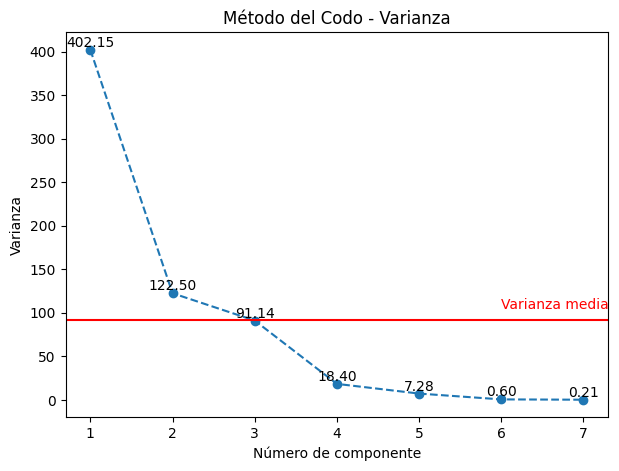

In [13]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cov) + 1), varianza_cov, marker='o', linestyle='--')
ax.axhline(y=varianza_total/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cov)-1, varianza_total/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

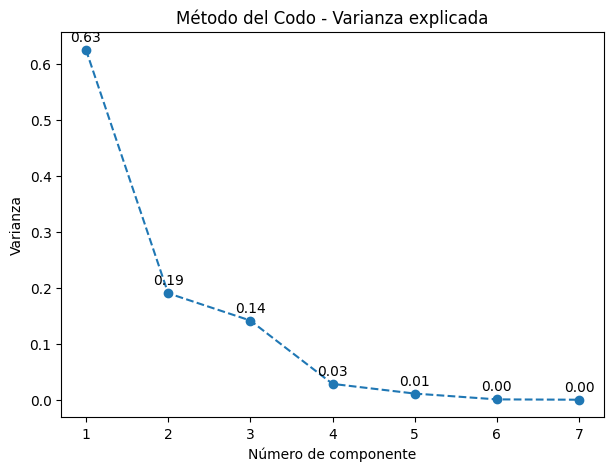

In [14]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

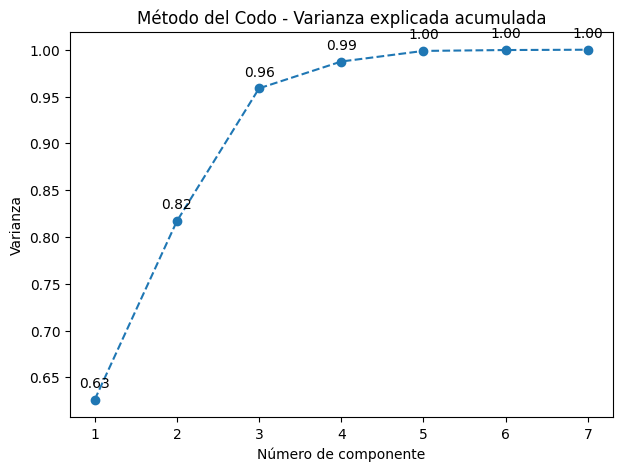

In [15]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [16]:
"""
Análisis de Componentes Principales - Matriz de Correlaciones
"""

ndf_media = ndf.mean()
ndf_de = ndf.std()
ndf_scaled = ((ndf - ndf_media) / ndf_de)

pca_cor = PCA()
componentes_cor = pca_cor.fit_transform(ndf_scaled)

varianza_cor = pca_cor.explained_variance_
std_componentes_cor = np.sqrt(pca_cor.explained_variance_) #Ver si eliminamos
varianza_explicada_cor = pca_cor.explained_variance_ratio_
varianza_explicada_acum_cor = np.cumsum(pca_cor.explained_variance_ratio_)
coeficientes_cor =  pca_cor.components_.T

#Generamos una tabla resumen
data_var_cor = {
    'Varianza (eigenvalues)': varianza_cor,
    'Desviación Estándar': std_componentes_cor,
    'Varianza Explicada': varianza_explicada_cor,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cor
}

variablespca_cor = pd.DataFrame(data_var_cor, index=[f'Componente {i+1}' for i in range(len(varianza_cor))]).reset_index()
variablespca_cor



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,2.1735,1.4743,0.3105,0.3105
1,Componente 2,1.7162,1.3100,0.2452,0.5557
2,Componente 3,1.3338,1.1549,0.1905,0.7462
3,Componente 4,0.8960,0.9466,0.1280,0.8742
4,Componente 5,0.5298,0.7279,0.0757,0.9499
5,Componente 6,0.2262,0.4756,0.0323,0.9822
6,Componente 7,0.1245,0.3528,0.0178,1.0000


In [17]:
coeficientespca_cor = pd.DataFrame(coeficientes_cor, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cor.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cor


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [18]:
componentespca_cor = pd.DataFrame(componentes_cor, columns=[f'Componente {i+1} ' for i in range(componentes_cor.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
6,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
7,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
8,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332
9,Denmark,-2.6090,1.9181,0.7859,-2.2559,-0.4244,0.1700,0.2428


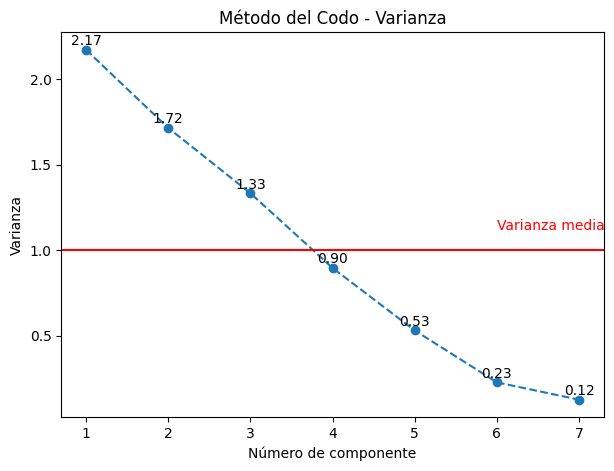

In [19]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cor) + 1), varianza_cor, marker='o', linestyle='--')
ax.axhline(y=np.trace(mcor)/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cor)-1, np.trace(mcor)/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

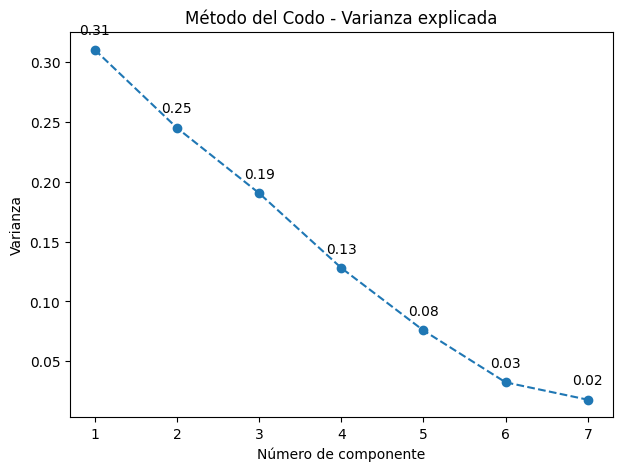

In [20]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

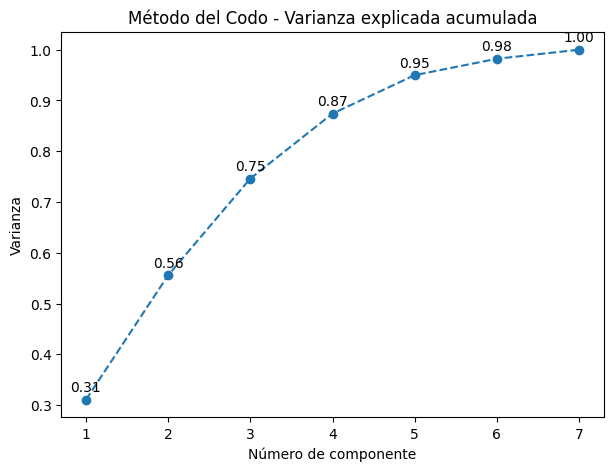

In [21]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [22]:
#Selección de componentes
componentes = componentespca_cor.iloc[:,0:3]
componentes

,Country Name,Componente 1,Componente 2
0,Argentina,1.1384,0.0073
1,Australia,-0.0137,-1.3198
2,Austria,-0.6793,0.4337
3,Belgium,-1.4955,-1.2323
4,Canada,0.7388,-2.1212
5,Chile,2.6753,-1.0488
6,Colombia,3.2579,0.9243
7,Costa Rica,2.1246,0.4846
8,Czechia,-1.2336,0.1987
9,Denmark,-2.6090,1.9181


In [23]:
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
ncomponentes = componentes.iloc[:,1:]
desc_pca = componentes.describe()
cv_pca = pd.DataFrame(ncomponentes.std() / ncomponentes.mean()).T
cv_pca.index = ['cv']
kurt_pca = pd.DataFrame(ncomponentes.kurt()).T
kurt_pca.index = ['kurt']
skew_pca = pd.DataFrame(ncomponentes.skew()).T
skew_pca.index = ['skew']
desc_pca = pd.concat([desc_pca, cv_pca, kurt_pca, skew_pca], axis=0).reset_index()
desc_pca = desc.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'
desc_pca

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [24]:
#Correlación entre primeros 2 componentes y variables de matriz de datos
cor_pca_variables = pd.concat([df.iloc[:, 2:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:]
cor_pca_variables

,Componente 1,Componente 2
Agricultural land,-0.5233,0.5347
Arable land,-0.6897,0.5526
Agricultural raw materials exports,0.5678,0.0998
Agricultural raw materials imports,-0.0255,0.6056
"Agriculture, forestry, and fishing, value added",0.8043,0.4104
Employment in agriculture,0.6627,0.5364
Rural population,-0.1219,0.5404


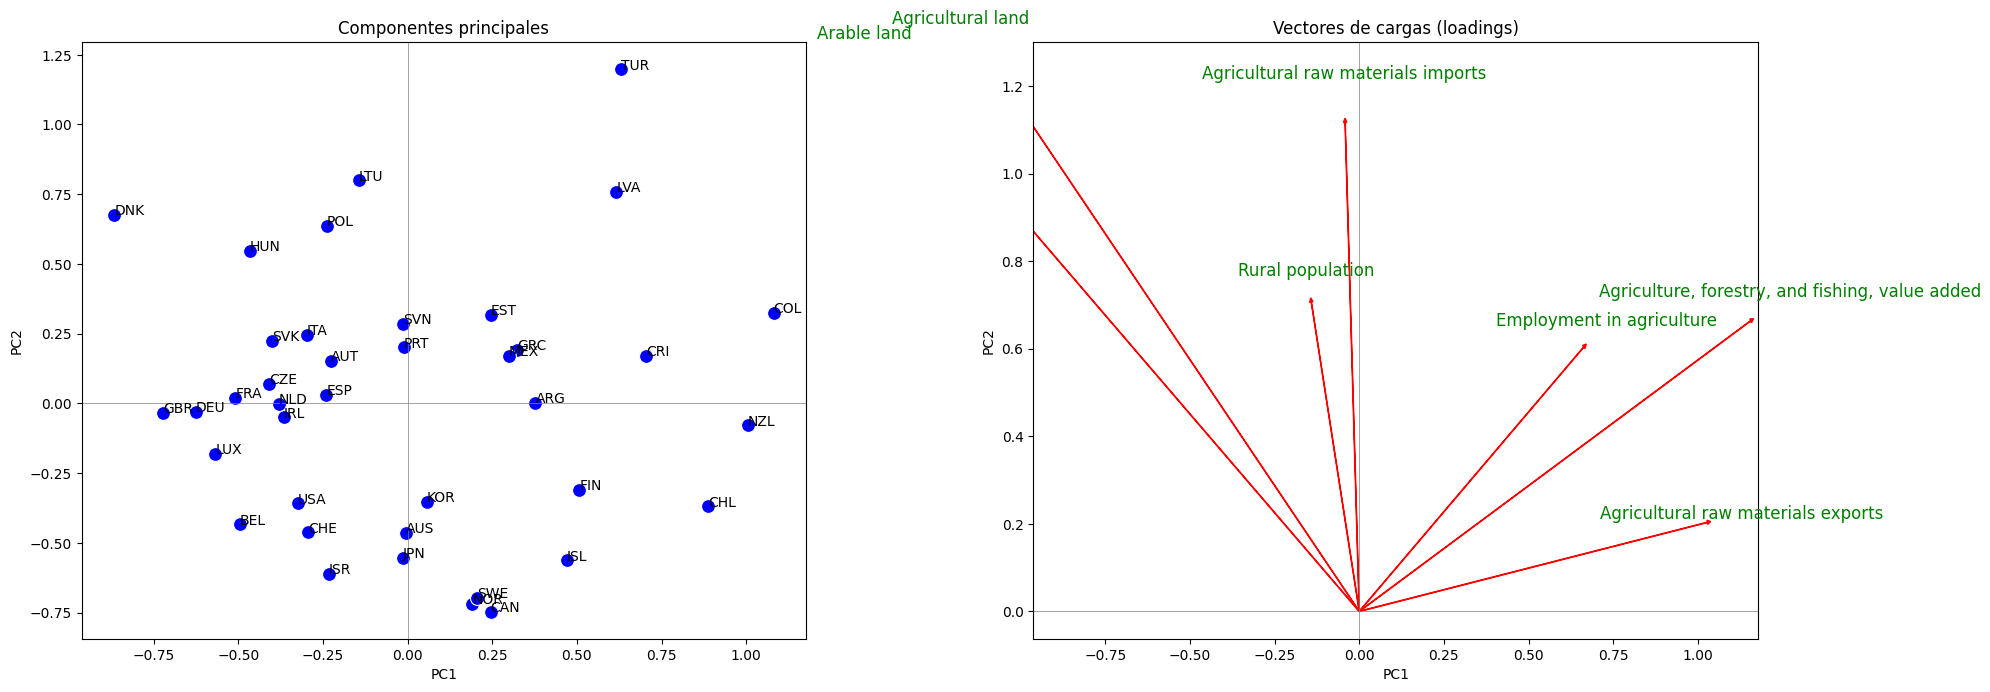

In [25]:
#Datos para gráfico Biplot. Se trbajará con c = 0.5 

ndf_scaled_promedio = np.mean(ndf_scaled, axis=0) #Dado que utilizaremos resultados de matriz de correlaciones, se trabaja sobre matriz de datos estandarizada
ndf_scaled_centrada = ndf_scaled - ndf_scaled_promedio

ndf_scaled_centrada_producto = np.dot(np.transpose(ndf_scaled_centrada), ndf_scaled_centrada)
autovalores, autovectores = np.linalg.eig(ndf_scaled_centrada_producto)

ndf_scaled_centrada_producto_autovalores = pd.DataFrame(np.diag(autovalores))
D = pd.DataFrame(np.diag(autovalores))
D_raiz_neg = pd.DataFrame(np.where(D != 0, np.power(D, -1/2),0))
D_cuarta = pd.DataFrame(np.where(D != 0, np.power(D, 1/4),0))

componentes_biplot = np.dot(componentespca_cor.iloc[:,1:], D_raiz_neg)
componentes_biplot = pd.DataFrame(np.dot(componentes_biplot, D_cuarta))

coeficientes_biplot = pd.DataFrame(np.dot(D_cuarta, coeficientespca_cor.iloc[:,1:]))

#Gráfico Biplot

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentes_biplot.iloc[:, 0], y=componentes_biplot.iloc[:, 1], ax=axes[0], s=100, color='blue')
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentes_biplot.iloc[i, 0], componentes_biplot.iloc[i, 1]))

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientes_biplot.shape[0]):
    axes[1].arrow(0, 0, coeficientes_biplot.iloc[i, 0], coeficientes_biplot.iloc[i, 1],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientes_biplot.iloc[i, 0]*1.1, coeficientes_biplot.iloc[i, 1]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

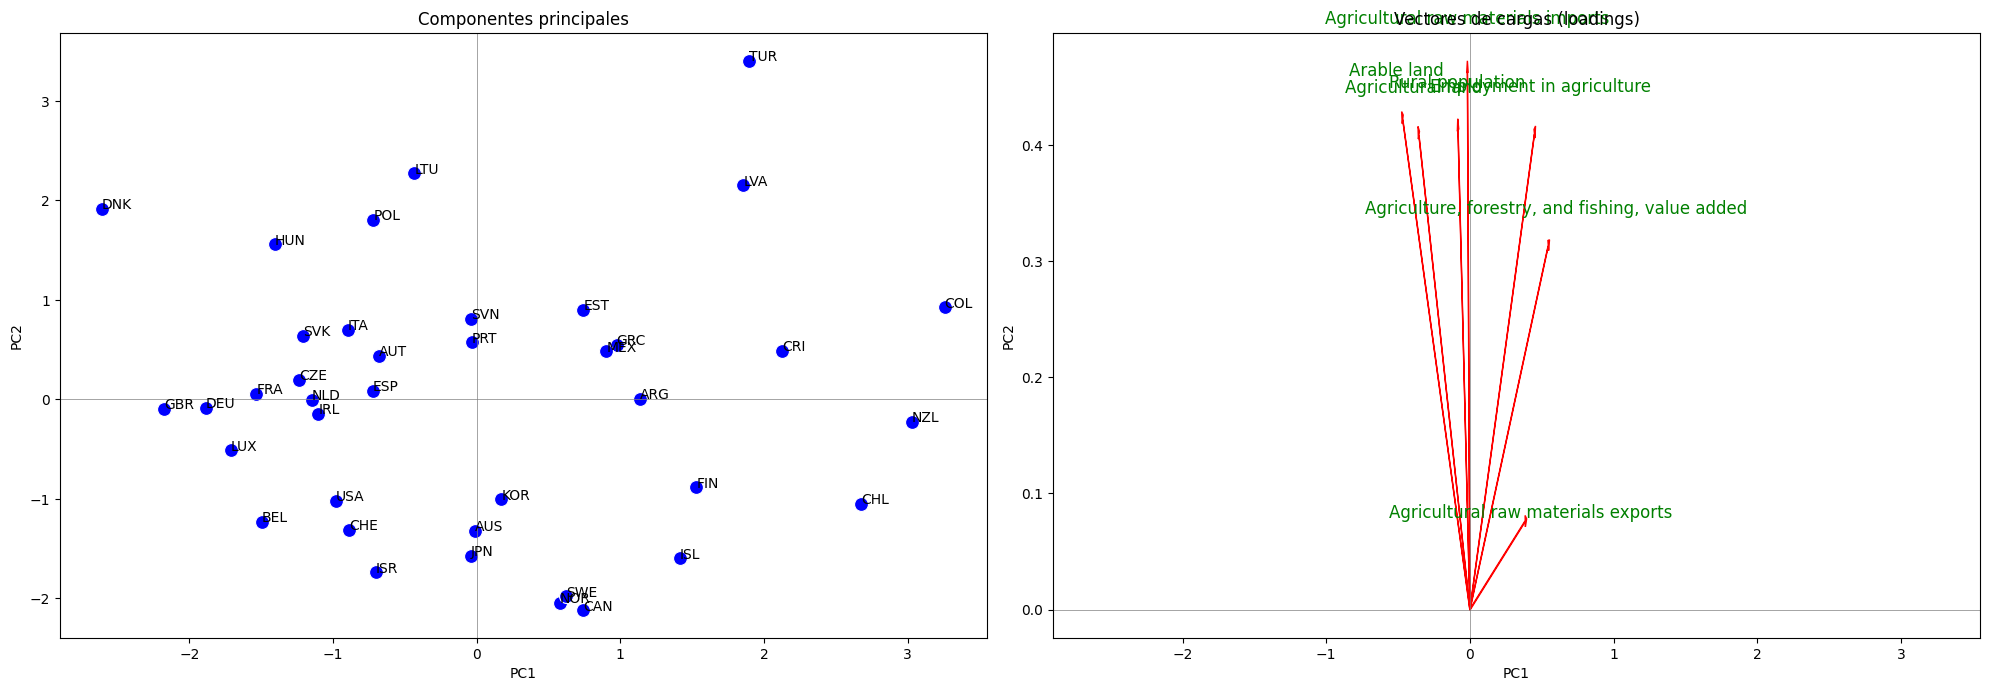

In [26]:
#Gráfico Biplot. Con c = 0

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentespca_cor.iloc[:, 1], y=componentespca_cor.iloc[:, 2], ax=axes[0], s=100, color='blue')
for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentespca_cor.iloc[i, 1], componentespca_cor.iloc[i, 2]))
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientespca_cor.shape[0]):
    axes[1].arrow(0, 0, coeficientespca_cor.iloc[i, 1], coeficientespca_cor.iloc[i, 2],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientespca_cor.iloc[i, 1]*1.1, coeficientespca_cor.iloc[i, 2]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

In [27]:
coeficientespca_cor

,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [28]:
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
6,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
7,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
8,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332
9,Denmark,-2.6090,1.9181,0.7859,-2.2559,-0.4244,0.1700,0.2428


#### **3. ANÁLISIS DE CLUSTERS JERÁRQUICO**

In [29]:
from sklearn.metrics import pairwise_distances

matriz_distancia = pairwise_distances(componentes.iloc[:,1:], metric='euclidean')
pd.DataFrame(matriz_distancia)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.0000,1.7575,1.8670,2.9110,2.1657,1.8648,2.3094,1.0956,2.3797,4.2064,0.9776,0.9731,2.6724,3.0273,0.5631,2.9784,1.6293,2.2450,2.5360,2.1482,1.9701,1.4005,2.2624,2.7586,2.8955,0.5302,2.2840,1.9043,2.1269,2.5856,1.3012,2.4308,1.4228,1.8648,2.0540,2.4181,3.4803,3.3174,2.3520
1,1.7575,0.0000,1.8756,1.4844,1.0993,2.7026,3.9673,2.7979,1.9478,4.1496,2.3461,1.6031,2.0503,2.2421,2.1118,3.1961,1.4565,1.6022,0.8046,2.2038,0.2536,0.3649,3.9444,3.6178,1.8777,2.0213,1.7331,3.2338,0.9351,3.2043,1.8912,2.2950,2.1279,1.5734,0.9158,0.8736,5.0956,2.4870,1.0104
2,1.8670,1.8756,0.0000,1.8553,2.9221,3.6675,3.9676,2.8043,0.6021,2.4346,1.4964,2.5715,0.9340,1.3162,1.6581,1.3377,2.9186,0.7152,2.1729,0.3428,2.1055,1.6706,3.0641,1.8558,1.4001,1.5822,0.6419,3.7657,2.7785,1.3727,0.6595,0.5681,0.7426,0.3530,2.7418,1.7593,3.9320,1.5884,1.4826
3,2.9110,1.4844,1.8553,0.0000,2.4046,4.1748,5.2198,4.0066,1.4549,3.3414,3.0918,3.0445,1.2892,1.2091,3.0441,2.7915,2.9343,1.1579,0.9427,2.0235,1.4955,1.6813,4.7644,3.6627,0.7495,2.9476,1.2740,4.6352,2.2263,3.1357,2.3212,1.8936,2.5075,1.5251,2.2444,0.6136,5.7451,1.3273,0.5599
4,2.1657,1.0993,2.9221,2.4046,0.0000,2.2136,3.9523,2.9513,3.0450,5.2463,3.0223,1.4680,3.1472,3.3210,2.6779,4.2578,0.8555,2.7015,1.4892,3.2602,0.9522,1.2529,4.4176,4.5486,2.9289,2.6083,2.8318,2.9739,0.1787,4.1890,2.8012,3.3785,3.0303,2.6465,0.1839,1.8158,5.6452,3.5518,2.0406
5,1.8648,2.7026,3.6675,4.1748,2.2136,0.0000,2.0573,1.6293,4.1031,6.0602,2.7456,1.1581,4.3515,4.6626,2.3313,4.8414,1.3740,3.8838,3.4456,3.9757,2.7644,2.5053,3.3040,4.5507,4.4175,2.3424,3.9602,0.8976,2.3220,4.4353,3.1569,4.2351,3.2875,3.5838,2.2560,3.5723,4.5200,4.9459,3.6535
6,2.3094,3.9673,3.9676,5.2198,3.9523,2.0573,0.0000,1.2156,4.5497,5.9504,2.5157,2.5018,4.8694,5.2441,2.3140,4.7053,3.1235,4.4883,4.7710,4.1590,4.1356,3.6406,1.8626,3.9313,5.1717,2.3968,4.5009,1.1707,3.9997,4.0737,3.3110,4.4758,3.2977,4.0705,3.9233,4.7105,2.8282,5.5299,4.6603
7,1.0956,2.7979,2.8043,4.0066,2.9513,1.6293,1.2156,0.0000,3.3703,4.9458,1.4436,1.4925,3.6831,4.0527,1.1512,3.6887,2.2001,3.2867,3.5952,3.0274,2.9853,2.4571,1.6891,3.1224,3.9623,1.2224,3.3069,1.1485,2.9646,3.1358,2.1606,3.3370,2.1864,2.8775,2.8875,3.5076,2.9281,4.3408,3.4476
8,2.3797,1.9478,0.6021,1.4549,3.0450,4.1031,4.5497,3.3703,0.0000,2.2018,2.0970,2.9671,0.3321,0.7142,2.2357,1.3697,3.2013,0.3668,2.0098,0.6048,2.1360,1.8491,3.6567,2.2231,0.8573,2.1545,0.2241,4.2831,2.8829,1.6873,1.2558,0.4414,1.3420,0.5215,2.8612,1.5511,4.4806,0.9882,1.2437
9,4.2064,4.1496,2.4346,3.3414,5.2463,6.0602,5.9504,4.9458,2.2018,0.0000,3.5022,4.9974,2.1501,2.1324,3.8376,1.2571,5.3445,2.5539,4.1251,2.1026,4.3343,4.0333,4.4726,2.2031,2.5931,3.7935,2.4185,6.0308,5.0847,1.8930,2.9057,1.8962,2.8006,2.6296,5.0624,3.6613,4.7450,2.0576,3.3590


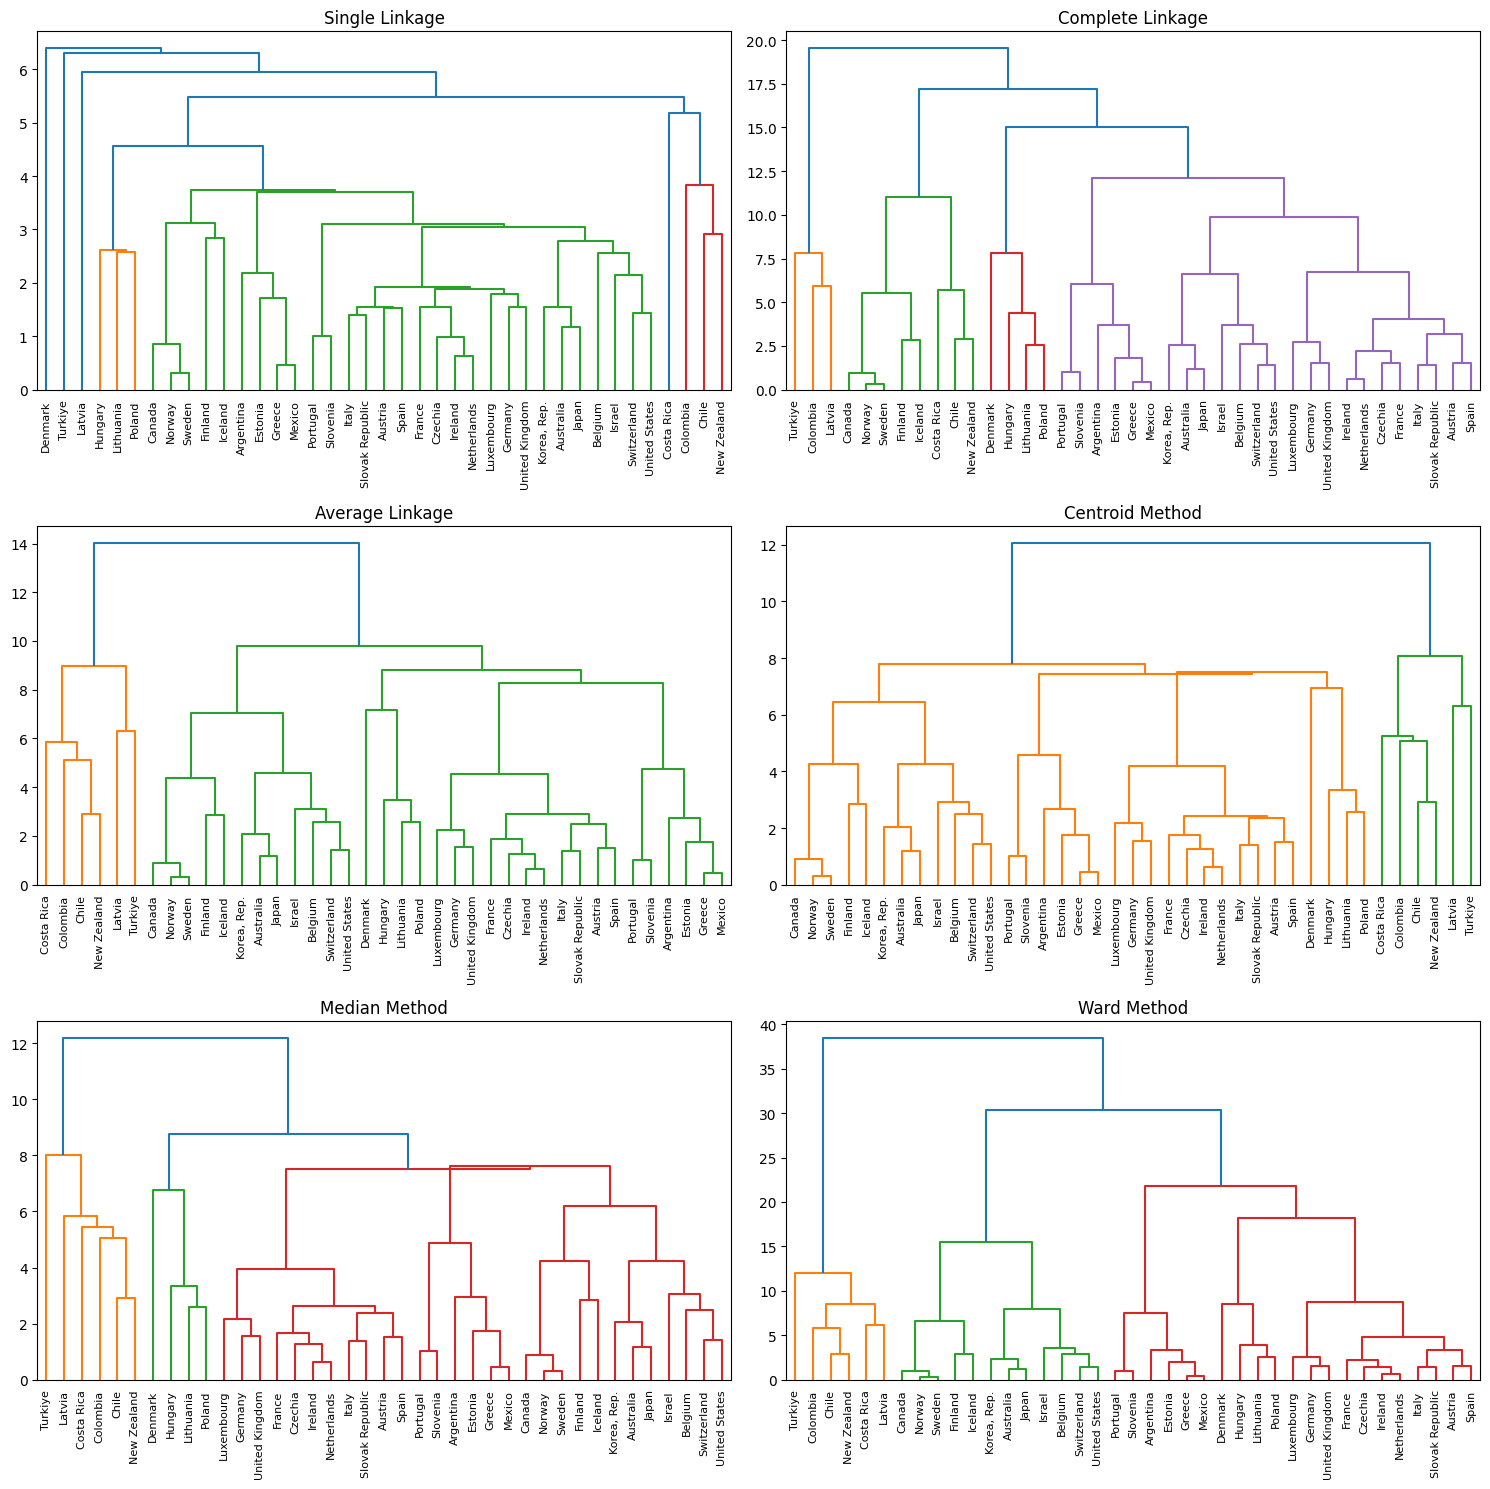

In [34]:
# Encadanamientos por Linkage
from scipy.cluster.hierarchy import linkage, dendrogram
h_single   = linkage(matriz_distancia, method="single")
h_complete = linkage(matriz_distancia, method="complete")
h_average  = linkage(matriz_distancia, method="average")
h_centroid = linkage(matriz_distancia, method="centroid")
h_median   = linkage(matriz_distancia, method="median")
h_ward     = linkage(matriz_distancia, method="ward")

etiquetas = df['Country Name'].to_list()

plt.rcParams['xtick.labelsize'] = 8


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Single Linkage")
dendrogram(h_single, labels=etiquetas, ax=axs[0, 0], leaf_rotation=90, leaf_font_size=8)

axs[0, 1].set_title("Complete Linkage")
dendrogram(h_complete, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[1, 0].set_title("Average Linkage")
dendrogram(h_average, labels=etiquetas, ax=axs[1, 0], leaf_rotation=90, leaf_font_size=8)

axs[1, 1].set_title("Centroid Method")
dendrogram(h_centroid, labels=etiquetas, ax=axs[1, 1], leaf_rotation=90, leaf_font_size=8)

axs[2, 0].set_title("Median Method")
dendrogram(h_median, labels=etiquetas, ax=axs[2, 0], leaf_rotation=90, leaf_font_size=8)

axs[2, 1].set_title("Ward Method")
dendrogram(h_ward, labels=etiquetas, ax=axs[2, 1], leaf_rotation=90, leaf_font_size=8)

plt.tight_layout()
plt.show()

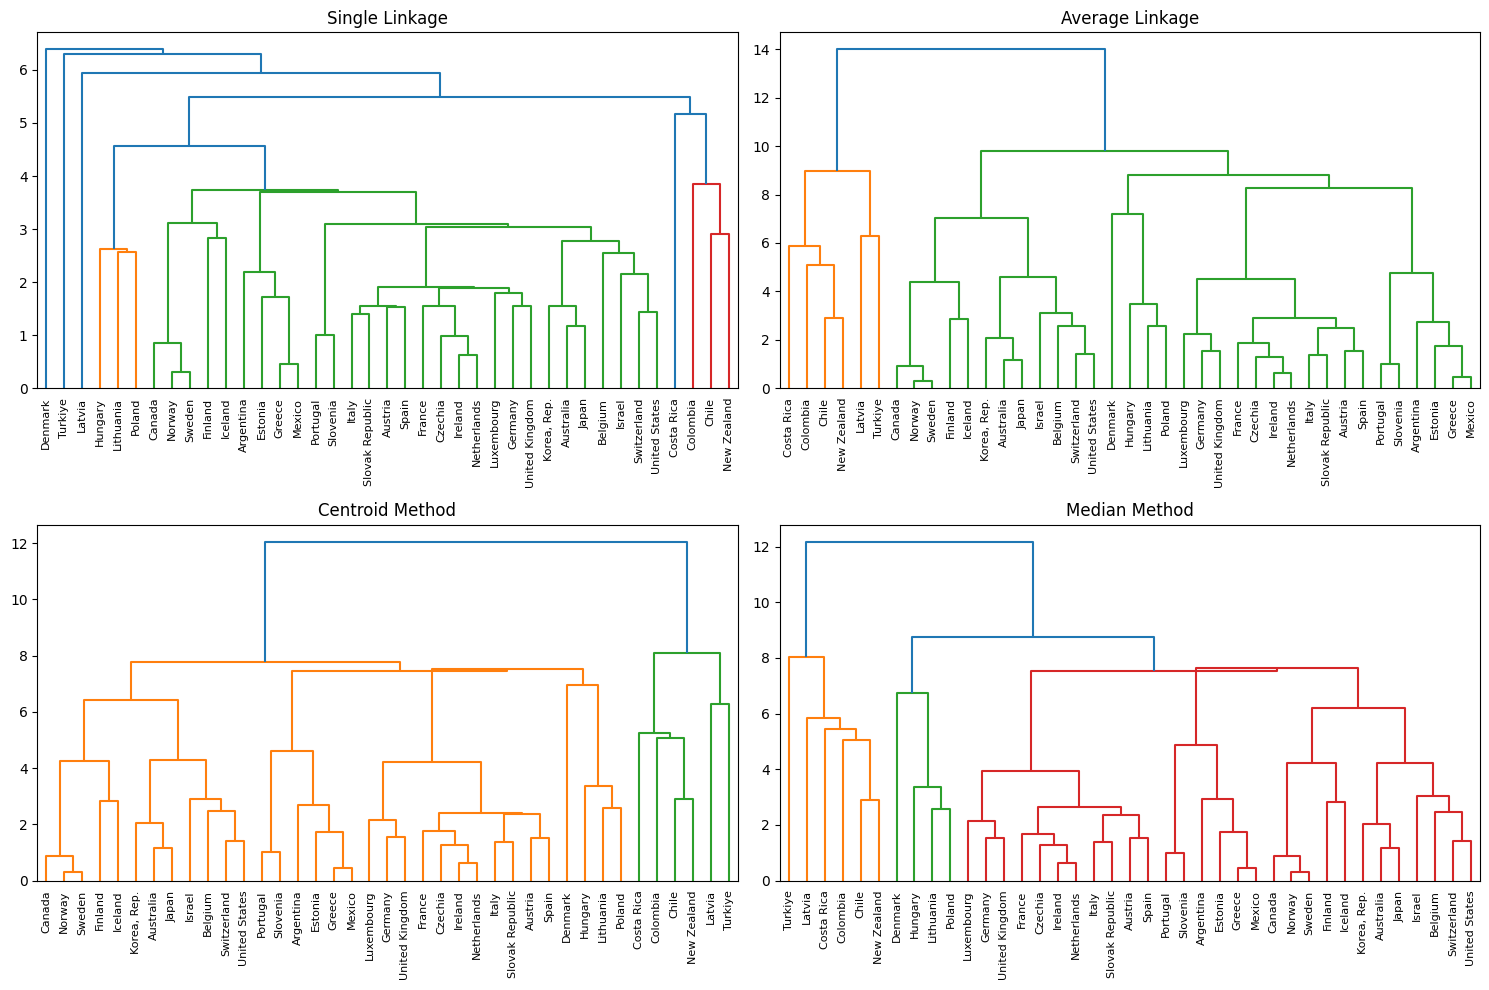

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram
h_single   = linkage(matriz_distancia, method="single")
# h_complete = linkage(matriz_distancia, method="complete")
h_average  = linkage(matriz_distancia, method="average")
h_centroid = linkage(matriz_distancia, method="centroid")
h_median   = linkage(matriz_distancia, method="median")
# h_ward     = linkage(matriz_distancia, method="ward")

etiquetas = df['Country Name'].to_list()

plt.rcParams['xtick.labelsize'] = 6


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].set_title("Single Linkage")
dendrogram(h_single, labels=etiquetas, ax=axs[0, 0], leaf_rotation=90, leaf_font_size=8)

# axs[0, 1].set_title("Complete Linkage")
# dendrogram(h_complete, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[0, 1].set_title("Average Linkage")
dendrogram(h_average, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[1, 0].set_title("Centroid Method")
dendrogram(h_centroid, labels=etiquetas, ax=axs[1, 0], leaf_rotation=90, leaf_font_size=8)

axs[1, 1].set_title("Median Method")
dendrogram(h_median, labels=etiquetas, ax=axs[1, 1], leaf_rotation=90, leaf_font_size=8)

# axs[2, 1].set_title("Ward Method")
# dendrogram(h_ward, labels=etiquetas, ax=axs[2, 1], leaf_rotation=90, leaf_font_size=8)

plt.tight_layout()
plt.show()

#### **4. ANÁLISIS DE FACTORES**

In [32]:
import numpy as np
import scipy.stats as stats

def mardia_test(data: np.ndarray, cov: bool = True):
    """
    Mardia's multivariate skewness and kurtosis.
    Calculates the Mardia's multivariate skewness and kurtosis coefficients
    as well as their corresponding statistical test. For large sample size
    the multivariate skewness is asymptotically distributed as a Chi-square
    random variable; here it is corrected for small sample size. However,
    both uncorrected and corrected skewness statistic are presented. Likewise,
    the multivariate kurtosis it is distributed as a unit-normal.

     Syntax: function [Mskekur] = Mskekur(X,c,alpha)

     Inputs:
          X - multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
          cov - boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)

     Outputs:
          - skewness test statistic
          - kurtosis test statistic
          - significance value for skewness
          - significance value for kurtosis
    """
    n, p = data.shape

    if cov:
        S = ((n - 1)/n) * np.cov(data.T)
    else:
        S = np.cov(data.T)

    # calculate mean
    data_mean = data.mean(axis=0)
    
    # inverse - check if singular matrix
    try:
        iS = np.linalg.inv(S)
    except Exception as e:
        # print for now
        print(e)
        return 0.0, 0.0, 0.0, 0.0
    
    # squared-Mahalanobis' distances matrix
    D: np.ndarray = (data - data_mean) @ iS @ (data - data_mean).T
    
    # multivariate skewness coefficient
    msc: float = np.sum(D**3)/n**2
    # multivariate kurtosis coefficient
    mkc: float = np.trace(D**2)/n

    # degrees of freedom
    df: float = (p * (p + 1) * (p + 2))/6

    # skewness test statistic corrected for small sample: it approximates to a chi-square distribution
    g_skew = ((p + 1)*(n + 1)*(n + 3))/(6*(((n + 1)*(p + 1)) - 6)) * msc 
    # significance value associated to the skewness corrected for small sample
    p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

    # kurtosis test statistic: it approximates to a unit-normal distribution
    g_kurt = (mkc - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
    # significance value associated to the kurtosis
    p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

    # Crear DataFrame con los datos
    data = {
        "Termino": ["Skewness Coefficient", "Kurtosis Coefficient"],
        "Coeficiente": [msc, mkc],
        "Estadístico": [g_skew, g_kurt],
        "P-valor": [p_skew, p_kurt]
    }

    df = pd.DataFrame(data)

    # Mostrar tabla formateada usando tabulate
    print(tabulate(df, headers='keys', tablefmt="pipe", showindex=False, floatfmt=".4f"))

In [33]:
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

class FA():
    """
    Clase para análisis exploratorio de los Factores de una matriz de datos mediante método de Factores Principales.

    Esta clase:
        (1) Entrena un modelo de análisis factorial mediante el Método de Factores Principales ("Principal Factor Method"), según se define en Rencher (2002, chap. 13);
        (2) Devuelve: eigenvalues, eigenvectors, loading matrix, communalities, uniquenesses, correlation matrix;
        (3) Permite al generación de una rotación de las cargas ("orthogonal varimax rotation").

    Parámetros
    ----------
    X : np.ndarray
        Matriz de datos.
    n_factors : int, opcional
        Número de factores a extraer.
        Default es None.
    svd_method : {‘randomized’, 'np.svd'}
        Método para la realización de la descomposicón en valores singulares ("Singular Value Decomposition").
        Default es 'randomized', de librería scikit-learn. Para cualquier otra opción, SVD será realizada desde numpy.

    Atributos
    ---------
    get_eig: :obj:`numpy.ndarray`
        Matrices de autovalores y autovectores.
    get_loadings: :obj:`numpy.ndarray`
        Matriz de cargas.
    get_communalities_uniquenesses: :obj:`numpy.ndarray`
        Mtrices de comunalidades y unicidades.
    get_fa: :obj: personalizado
        Salida similiar a STATA.
    get_comparative_corr_matrix: :obj: personalizado
        Comparación para la matriz de correlaciones (estimada vs. original).
    get_rotated_loadings: :obj:`numpy.ndarray`
        Cargas rotadas. Permite ajuste Kaiser (None por Default).

    """
    def __init__(self, X, n_factors=None, svd_method="randomized"):
        self.X = X
        self.n_factors = n_factors
        self.svd_method = svd_method

    def get_eig(self):
        """ 
        Regresa los autovalores y autovectores de la matriz de correlación corregida según Método de Factores Principales,
        de acuerdo al método de SVD seleccionado. 
        """ 

        self.X_corr = np.corrcoef(self.X, rowvar=False)
        self.X_corr_inv = np.linalg.inv(self.X_corr)
        self.X_corr_inv_diag = np.diag(self.X_corr_inv)
        self.R = 1 - (1 / self.X_corr_inv_diag)
        self.X_corr_o = self.X_corr.copy()
        np.fill_diagonal(self.X_corr, self.R)
        self.eigenvalues, _ = np.linalg.eig(self.X_corr) #Para conocer los autovalores negativos
        if self.svd_method == "randomized_svd":
            self.eigenvectors, self.eigenvalues_p, _ = randomized_svd(self.X_corr, n_components=self.X_corr.shape[1], random_state=1234567890)
        else:
            self.eigenvectors, self.eigenvalues_p, _ = np.linalg.svd(self.X_corr, full_matrices=False)

        return self.eigenvalues, self.eigenvectors

    def get_loadings(self):
        """ 
        Regresa las cargas de los Factores, conservando solo aquellas cargas cuyos autovalores sean positivos.
        """  

        self.get_eig()

        self.loadings = self.eigenvectors * np.sqrt(self.eigenvalues_p)
        positive_filter = np.array([i for i, value in enumerate(np.round(self.eigenvalues_p, decimals=10)) if value in np.round(self.eigenvalues, decimals=10)])
        self.positive_loadings = self.loadings[:, positive_filter]

        if self.n_factors == None:
            self.positive_loadings
        else:
            self.positive_loadings = self.positive_loadings[:, :self.n_factors]

        return self.positive_loadings
    
    def get_communalities_uniquenesses(self):
        """ 
        Regresa las comunalidades y unicidades de los Factores.
        """ 

        self.get_loadings()
        self.communalities, self.uniquenesses = np.sum((self.positive_loadings**2), axis=1), 1 - np.sum((self.positive_loadings**2), axis=1)

        return self.communalities, self.uniquenesses
        
    
    def get_fa(self):
        """
        Regresa un resumen detallado de análisis factorial, replicando salida de STATA.
        """      

        self.get_communalities_uniquenesses()                 
        loadings_matrix = pd.DataFrame(self.positive_loadings, columns=[f"Factor {i+1}" for i in range(self.positive_loadings.shape[1])], index=[f"x{i+1}" for i in range(self.positive_loadings.shape[0])]).reset_index(names='Variable')
        loadings_matrix = pd.concat([loadings_matrix, pd.DataFrame(self.uniquenesses, columns=['Uniqueness']), pd.DataFrame(self.communalities, columns=['Communality'])], axis=1)
        eigenv_matrix = pd.DataFrame(np.sort(self.eigenvalues)[::-1], columns=['Eigenvalue'], index=[f"Factor {i+1}" for i in range(self.eigenvalues.shape[0])]).reset_index(names='Factor')
        eigenv_proportion = [np.sort(self.eigenvalues)[::-1][i] / np.sum(np.sort(self.eigenvalues)[::-1]) for i in range(len(self.eigenvalues))]
        eigenv_proportion_cs = np.cumsum(eigenv_proportion)
        eigenv_matrix = pd.concat([eigenv_matrix, pd.DataFrame(eigenv_proportion, columns=['Proportion']), pd.DataFrame(eigenv_proportion_cs, columns=['Cumulative'])], axis=1)

        eigenv_table = tabulate(eigenv_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        loadings_table = tabulate(loadings_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        eigenv_lines = eigenv_table.splitlines()
        loadings_lines = loadings_table.splitlines()

        max_lines = max(len(eigenv_lines), len(loadings_lines))
        eigenv_lines += [''] * (max_lines - len(eigenv_lines))
        loadings_lines += [''] * (max_lines - len(loadings_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(eigenv_lines, loadings_lines))
        
        print("Resultados de Factor Analysis")
        print(combined_output)
    
    def get_comparative_corr_matrix(self):
        """
        Regresa una comparación de la matriz de correlaciones (estimada por el modelo factorial vs. original).
        """
        self.get_communalities_uniquenesses()
        estimated_corr = self.positive_loadings @ self.positive_loadings.T + np.diag(self.uniquenesses)
        estimated_corr_matrix = pd.DataFrame(estimated_corr, columns=[f"x{i+1}" for i in range(estimated_corr.shape[1])], index=[f"x{i+1}" for i in range(estimated_corr.shape[0])]).reset_index(names='Variables')
        corr = self.X_corr_o
        corr_matrix = pd.DataFrame(corr, columns=[f"x{i+1}" for i in range(corr.shape[1])], index=[f"x{i+1}" for i in range(corr.shape[0])]).reset_index(names='Variables')

        est_corr_table = tabulate(estimated_corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        corr_table = tabulate(corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        est_corr_lines = est_corr_table.splitlines()
        corr_lines = corr_table.splitlines()

        max_lines = max(len(est_corr_lines), len(corr_lines))
        est_corr_lines += [''] * (max_lines - len(est_corr_lines))
        corr_lines += [''] * (max_lines - len(corr_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(est_corr_lines, corr_lines))
     

        print("Matriz de correlación estimada (izquierda) vs. Matriz de correlación (derecha)")
        print(combined_output)
        

    def get_rotated_loadings(self, kaiser=False):
        """
        Regresa la cargas rotadas del modelo factorial (orthogonal varimax rotation").
        Permite aplicar adecuación Kaiser.
        """
        self.get_communalities_uniquenesses()
        X = self.positive_loadings.copy()
        n_rows, n_cols = X.shape
        if n_cols < 2:
            return X

        # normalize the loadings matrix
        # using sqrt of the sum of squares (Kaiser)
        if kaiser:
            normalized_mtx = np.apply_along_axis(
                lambda x: np.sqrt(np.sum(x**2)), 1, X.copy()
            )
            X = (X.T / normalized_mtx).T

        # initialize the rotation matrix
        # to N x N identity matrix
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(5000):
            old_d = d

            # take inner product of loading matrix
            # and rotation matrix
            basis = np.dot(X, rotation_mtx)

            # transform data for singular value decomposition using updated formula :
            # B <- t(x) %*% (z^3 - z %*% diag(drop(rep(1, p) %*% z^2))/p)
            diagonal = np.diag(np.squeeze(np.repeat(1, n_rows).dot(basis**2)))
            transformed = X.T.dot(basis**3 - basis.dot(diagonal) / n_rows)

            # perform SVD on
            # the transformed matrix
            U, S, V = np.linalg.svd(transformed)

            # take inner product of U and V, and sum of S
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)

            # check convergence
            if d < old_d * (1 + 1e-5):
                break

        # take inner product of loading matrix
        # and rotation matrix
        X = np.dot(X, rotation_mtx)

        # de-normalize the data
        if kaiser:
            X = X.T * normalized_mtx
        else:
            X = X.T

        # convert loadings matrix to data frame
        rotated_loadings = X.T.copy()
        return rotated_loadings